In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'E:\Projects\CTS\data\diabetes_012_health_indicators_BRFSS2021.csv')


data.head(10)

# 0 = no diabetes 1 = prediabetes 2 = diabetes
# 0 = no high BP 1 = high BP
# Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
# physical activity in past 30 days - not including job 0 = no 1 = yes
# Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per
# 0 = female 1 = male
# 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

,Diabetes,HighBP,BMI,Smoker,PhysActivity,HvyAlcoholConsump,Sex,Age
0,0,0,15,1,0,0,0,11
1,2,1,28,0,0,0,0,11
2,2,1,33,0,1,0,0,9
3,2,0,29,0,1,0,1,12
4,0,0,24,1,0,0,1,13
5,0,1,40,1,1,0,0,10
6,0,1,27,1,0,0,0,10
7,2,0,24,0,0,0,1,12
8,0,1,30,0,0,0,0,7
9,0,1,36,1,0,0,1,10


In [3]:
data.shape

(236378, 8)

In [4]:
data.columns

Index(['Diabetes', 'HighBP', 'BMI', 'Smoker', 'PhysActivity',
       'HvyAlcoholConsump', 'Sex', 'Age'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Diabetes           236378 non-null  int64
 1   HighBP             236378 non-null  int64
 2   BMI                236378 non-null  int64
 3   Smoker             236378 non-null  int64
 4   PhysActivity       236378 non-null  int64
 5   HvyAlcoholConsump  236378 non-null  int64
 6   Sex                236378 non-null  int64
 7   Age                236378 non-null  int64
dtypes: int64(8)
memory usage: 14.4 MB


In [6]:
data['Age']=data['Age'].astype('int64')
data['BMI']=data['BMI'].astype('int64')
data['Smoker']=data['Smoker'].astype('int64')
data['PhysActivity']=data['PhysActivity'].astype('int64')
data['HvyAlcoholConsump']=data['HvyAlcoholConsump'].astype('int64')
data['Sex']=data['Sex'].astype('int64')
data['Diabetes']=data['Diabetes'].astype('int64')
data['HighBP']=data['HighBP'].astype('int64')

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes,236378.0,0.307791,0.705037,0.0,0.0,0.0,0.0,2.0
HighBP,236378.0,0.418558,0.493324,0.0,0.0,0.0,1.0,1.0
BMI,236378.0,28.953579,6.552055,12.0,24.0,28.0,32.0,99.0
Smoker,236378.0,0.411997,0.492196,0.0,0.0,0.0,1.0,1.0
PhysActivity,236378.0,0.779231,0.414766,0.0,1.0,1.0,1.0,1.0
HvyAlcoholConsump,236378.0,0.062083,0.241306,0.0,0.0,0.0,0.0,1.0
Sex,236378.0,0.477824,0.499509,0.0,0.0,0.0,1.0,1.0
Age,236378.0,7.863930,3.236997,1.0,5.0,8.0,10.0,13.0


In [8]:
data.isnull().sum()

Diabetes             0
HighBP               0
BMI                  0
Smoker               0
PhysActivity         0
HvyAlcoholConsump    0
Sex                  0
Age                  0
dtype: int64

In [9]:
data.duplicated().sum()

216788

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(19590, 8)

In [12]:
data

,Diabetes,HighBP,BMI,Smoker,PhysActivity,HvyAlcoholConsump,Sex,Age
0,0,0,15,1,0,0,0,11
1,2,1,28,0,0,0,0,11
2,2,1,33,0,1,0,0,9
3,2,0,29,0,1,0,1,12
4,0,0,24,1,0,0,1,13
...,...,...,...,...,...,...,...,...
236237,2,0,49,0,1,0,0,2
236277,0,1,41,0,0,1,0,11
236286,0,1,40,0,0,1,1,11
236335,2,1,40,0,1,1,0,5


In [13]:
for col in data.columns:
  print(f"{col} : {data[col].value_counts()}\n")

Diabetes : Diabetes
0    10807
2     5893
1     2890
Name: count, dtype: int64

HighBP : HighBP
1    10182
0     9408
Name: count, dtype: int64

BMI : BMI
27    747
30    741
31    714
29    713
28    712
     ... 
89      1
90      1
95      1
91      1
92      1
Name: count, Length: 84, dtype: int64

Smoker : Smoker
1    9867
0    9723
Name: count, dtype: int64

PhysActivity : PhysActivity
1    10932
0     8658
Name: count, dtype: int64

HvyAlcoholConsump : HvyAlcoholConsump
0    15176
1     4414
Name: count, dtype: int64

Sex : Sex
0    10345
1     9245
Name: count, dtype: int64

Age : Age
9     1972
8     1886
10    1847
7     1844
6     1700
11    1695
5     1643
4     1423
12    1422
13    1259
3     1187
2      968
1      744
Name: count, dtype: int64



In [14]:
data = data[data['Diabetes'] != 1].replace(2, 1) #droped Prediabeties as its not really a concern

In [15]:
for col in data.columns:
  print(f"{col} : {data[col].value_counts()}\n")

Diabetes : Diabetes
0    10807
1     5893
Name: count, dtype: int64

HighBP : HighBP
1    8630
0    8070
Name: count, dtype: int64

BMI : BMI
27    598
30    590
31    576
25    571
28    571
     ... 
88      1
89      1
95      1
91      1
92      1
Name: count, Length: 83, dtype: int64

Smoker : Smoker
1    8471
0    8229
Name: count, dtype: int64

PhysActivity : PhysActivity
1    9135
0    7565
Name: count, dtype: int64

HvyAlcoholConsump : HvyAlcoholConsump
0    12529
1     4171
Name: count, dtype: int64

Sex : Sex
0    8763
1    7937
Name: count, dtype: int64

Age : Age
9     1605
8     1587
1     1572
7     1551
10    1518
6     1469
5     1422
11    1401
4     1260
12    1192
3     1078
13    1045
Name: count, dtype: int64



([<matplotlib.patches.Wedge at 0x1d3ffd24d70>,
 [Text(-0.4905191252562899, 0.9845765525127055, 'no diabetes'),
  Text(0.4905190330735775, -0.9845765984384165, 'diabetes')],
 [Text(-0.2675558865034308, 0.5370417559160211, '64.71'),
  Text(0.26755583622195134, -0.537041780966409, '35.29')])

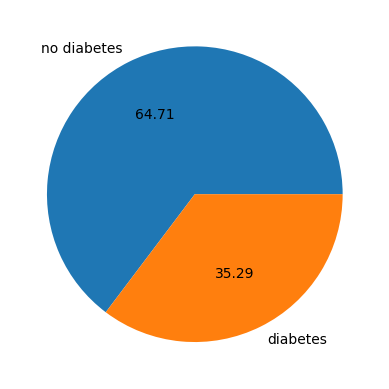

In [16]:
plt.pie(x= data.Diabetes.value_counts() , labels=['no diabetes','diabetes'] , autopct='%.02f')

In [17]:
def visualize_feature(feature_name, df):
    fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Create a 3x1 grid of subplots
    
    # Pie chart
    df[feature_name].value_counts().plot(kind='pie', autopct='%.02f', ax=axes[0])
    axes[0].set_title(f'Pie Chart: {feature_name}')
    
    # Crosstab heatmap
    cross_tab = pd.crosstab(df[feature_name], df['Diabetes'], normalize='index')
    sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='0.2%', cbar=False, ax=axes[1])
    axes[1].set_title(f'Cross-Tabulation: {feature_name} vs Diabetes(%)')

    # Crosstab bar plot
    cross_tab.plot(kind='bar', ax=axes[2])
    axes[2].set_title(f'Bar Plot: {feature_name} vs Diabetes')
    
    plt.tight_layout()
    plt.show()

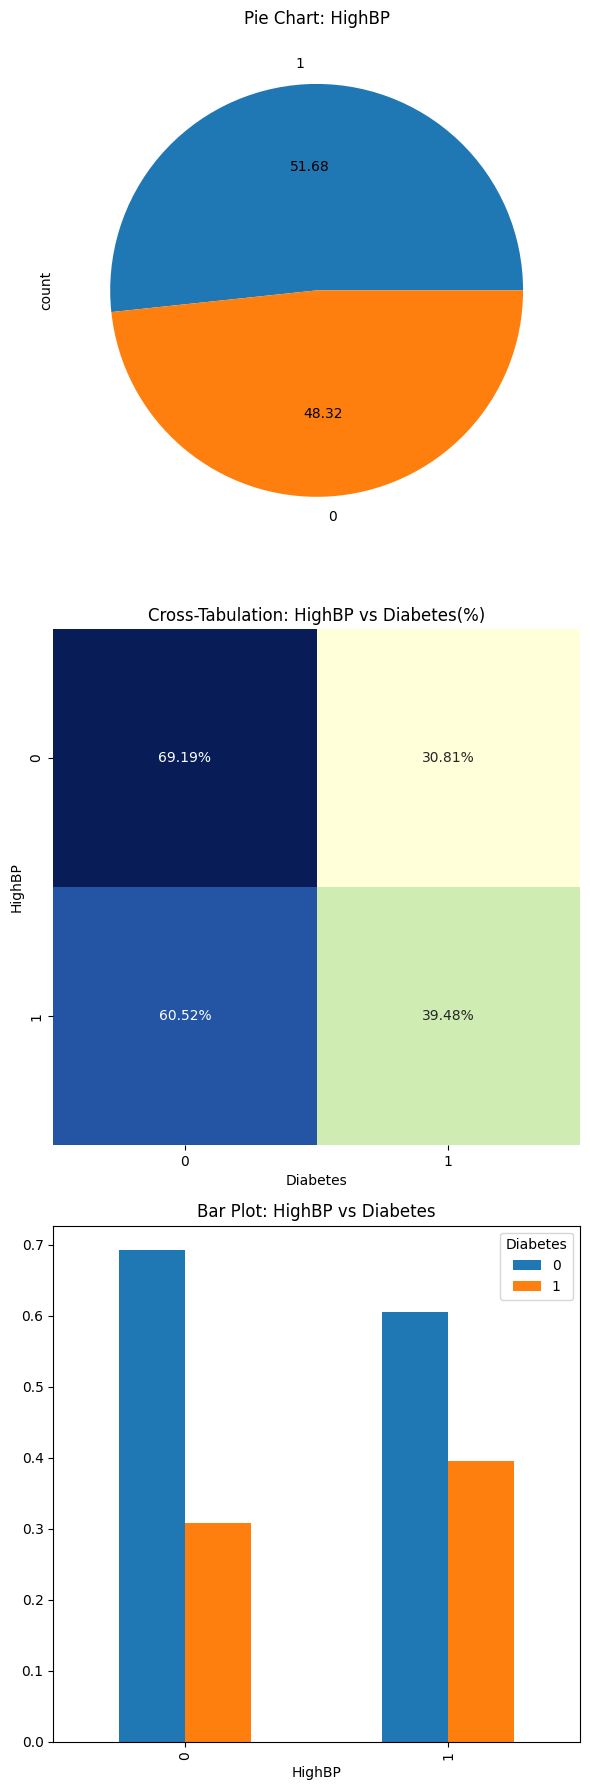

In [18]:
visualize_feature('HighBP' , data)

In [19]:
print(data['Diabetes'].value_counts())

Diabetes
0    10807
1     5893
Name: count, dtype: int64


In [20]:
from imblearn.under_sampling import RandomUnderSampler
# Assuming your dataset is in df
X = data.drop('Diabetes', axis=1)  # All features except 'Diabetes'
y = data['Diabetes']  # The target column

# Apply Random Undersampling to balance the majority class
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Diabetes'])], axis=1)

# Check the new class distribution
print(df_resampled['Diabetes'].value_counts())

Diabetes
0    5893
1    5893
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1d388d19760>,
 [Text(6.735557395310444e-17, 1.1, 'no diabetes'),
  Text(-2.0206672185931328e-16, -1.1, 'diabetes')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

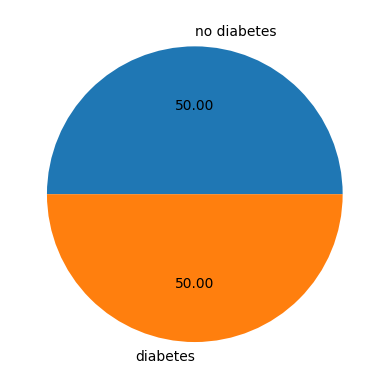

In [21]:
plt.pie(x= df_resampled.Diabetes.value_counts() , labels=['no diabetes','diabetes'] , autopct='%.02f')

In [22]:
# Check the balance of the 'Diabetes' column
print("Diabetes column distribution:")
print(df_resampled['Diabetes'].value_counts())

# Check the balance of other categorical columns
print("\nHighBP column distribution:")
print(df_resampled['HighBP'].value_counts())

print("\nSmoker column distribution:")
print(df_resampled['Smoker'].value_counts())

print("\nPhysActivity column distribution:")
print(df_resampled['PhysActivity'].value_counts())

print("\nHvyAlcoholConsump column distribution:")
print(df_resampled['HvyAlcoholConsump'].value_counts())

print("\nSex column distribution:")
print(df_resampled['Sex'].value_counts())

# For numeric columns like BMI or Age, you can check descriptive statistics
print("\nBMI column summary:")
print(df_resampled['BMI'].describe())

print("\nAge column summary:")
print(df_resampled['Age'].describe())


Diabetes column distribution:
Diabetes
0    5893
1    5893
Name: count, dtype: int64

HighBP column distribution:
HighBP
1    6226
0    5560
Name: count, dtype: int64

Smoker column distribution:
Smoker
1    5997
0    5789
Name: count, dtype: int64

PhysActivity column distribution:
PhysActivity
1    6486
0    5300
Name: count, dtype: int64

HvyAlcoholConsump column distribution:
HvyAlcoholConsump
0    9180
1    2606
Name: count, dtype: int64

Sex column distribution:
Sex
0    6158
1    5628
Name: count, dtype: int64

BMI column summary:
count    11786.000000
mean        34.321992
std         11.371854
min         12.000000
25%         26.000000
50%         33.000000
75%         41.000000
max         99.000000
Name: BMI, dtype: float64

Age column summary:
count    11786.000000
mean         7.444256
std          3.424138
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         13.000000
Name: Age, dtype: float64


In [23]:
def check_balance_Categorical_Columns(data):
    # Set the plot style
    sns.set(style="whitegrid")

    # Plot the distribution of 'Diabetes'
    plt.figure(figsize=(12, 8))

    # Diabetes column distribution
    plt.subplot(2, 3, 1)
    sns.countplot(x='Diabetes', data=data, palette='Set2')
    plt.title('Diabetes Distribution')

    # HighBP column distribution
    plt.subplot(2, 3, 2)
    sns.countplot(x='HighBP', data=data, palette='Set2')
    plt.title('HighBP Distribution')

    # Smoker column distribution
    plt.subplot(2, 3, 3)
    sns.countplot(x='Smoker', data=data, palette='Set2')
    plt.title('Smoker Distribution')

    # PhysActivity column distribution
    plt.subplot(2, 3, 4)
    sns.countplot(x='PhysActivity', data=data, palette='Set2')
    plt.title('Physical Activity Distribution')

    # HvyAlcoholConsump column distribution
    plt.subplot(2, 3, 5)
    sns.countplot(x='HvyAlcoholConsump', data=data, palette='Set2')
    plt.title('Heavy Alcohol Consumption')

    # Sex column distribution
    plt.subplot(2, 3, 6)
    sns.countplot(x='Sex', data=data, palette='Set2')
    plt.title('Sex Distribution')

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [24]:
def check_balance_Numeric_Columns(data):
    # Plot histograms for numeric columns
    plt.figure(figsize=(12, 5))

    # BMI distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data['BMI'], kde=True, color='skyblue')
    plt.title('BMI Distribution')

    # Age distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data['Age'], kde=True, color='lightgreen')
    plt.title('Age Distribution')

    # Display the plots
    plt.tight_layout()
    plt.show()

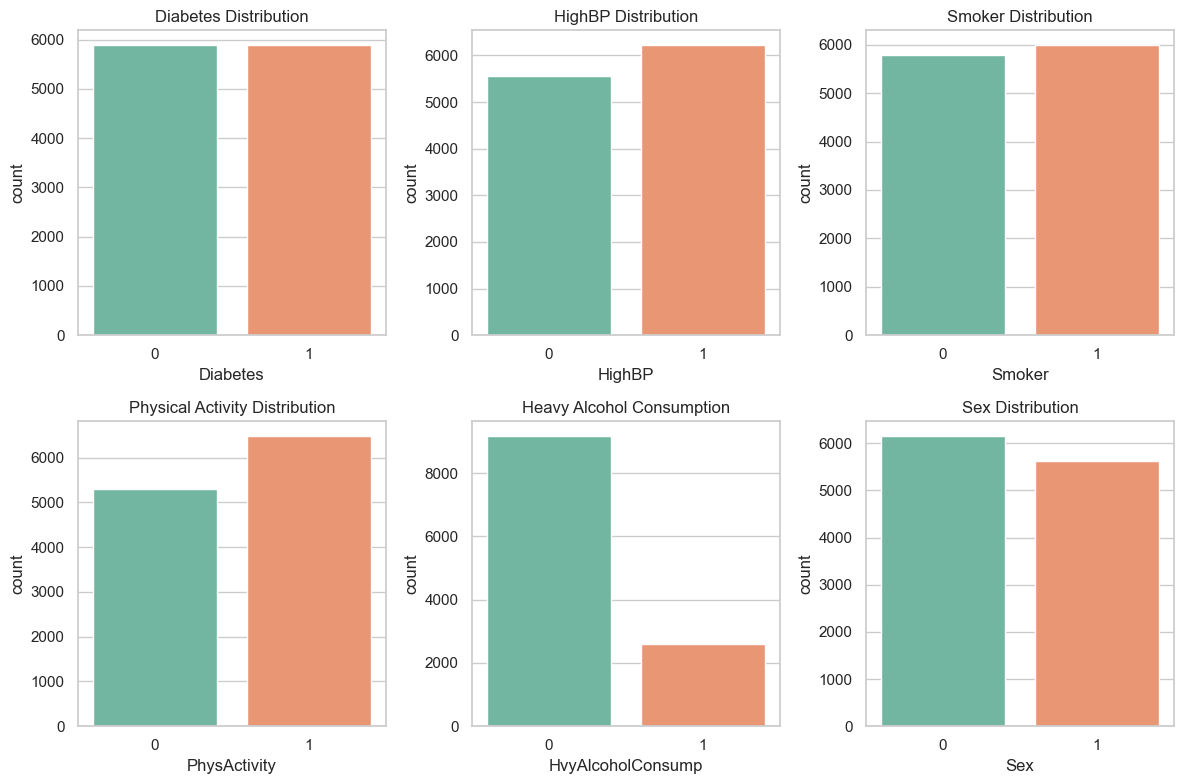

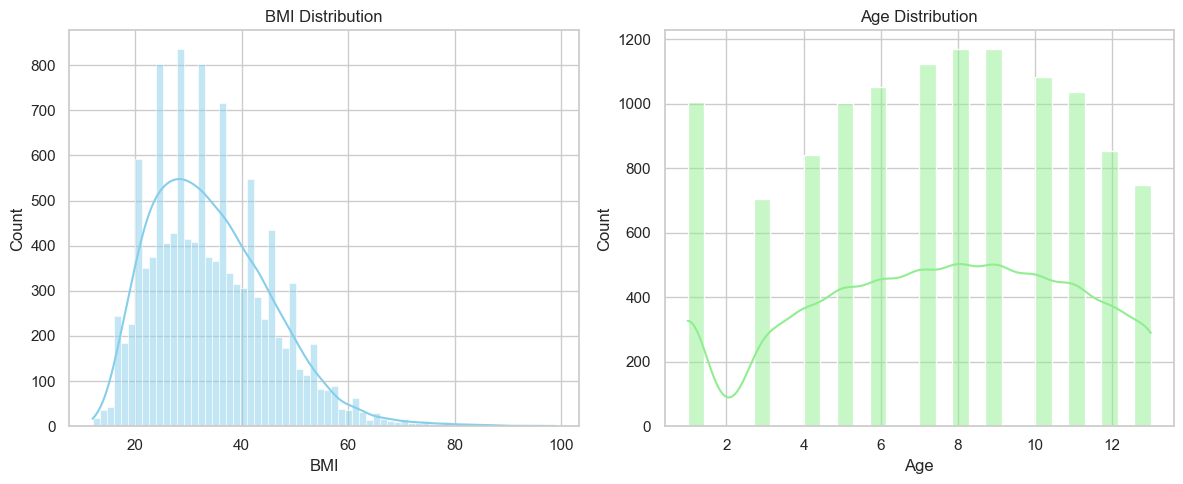

In [25]:
check_balance_Categorical_Columns(df_resampled)
check_balance_Numeric_Columns(df_resampled)

In [26]:
data = df_resampled

In [27]:
data.shape

(11786, 8)

In [28]:
import random
# Mapping age categories to age ranges
age_range_mapping = {
    1: (18, 24),
    2: (25, 29),
    3: (30, 34),
    4: (35, 39),
    5: (40, 44),
    6: (45, 49),
    7: (50, 54),
    8: (55, 59),
    9: (60, 64),
    10: (65, 69),
    11: (70, 74),
    12: (75, 79),
    13: (80, 90)  # Assign a range for 80 or older
}

# Function to generate random age based on the age category
def generate_random_age(category):
    if category in age_range_mapping:
        return random.randint(*age_range_mapping[category])
    return None  # For safety if an unknown category is encountered

# Apply the random age generation
data['Age_new'] = data['Age'].apply(generate_random_age)

# Replace the old Age column with new random ages
data['Age'] = data['Age_new']

# Drop the Age_new column
data.drop('Age_new', axis=1, inplace=True)

In [29]:
data

,HighBP,BMI,Smoker,PhysActivity,HvyAlcoholConsump,Sex,Age,Diabetes
165690,1,24,1,0,1,1,37,0
60917,1,51,0,0,0,0,56,0
52160,0,44,1,0,0,1,59,0
173337,0,21,0,1,1,1,22,0
34812,1,20,0,1,0,1,19,0
...,...,...,...,...,...,...,...,...
235850,0,47,0,1,0,0,40,1
236034,1,17,0,1,0,0,88,1
236236,1,21,0,0,0,1,60,1
236237,0,49,0,1,0,0,19,1


In [30]:
from sklearn.model_selection import train_test_split

# Stratified sampling
df_reduced, _ = train_test_split(data, train_size=5000, stratify=df_resampled[['Diabetes','HighBP','Sex','Age']], random_state=42)

# Check the shape of the reduced dataset
print(f"Reduced dataset size: {df_reduced.shape}")

Reduced dataset size: (5000, 8)


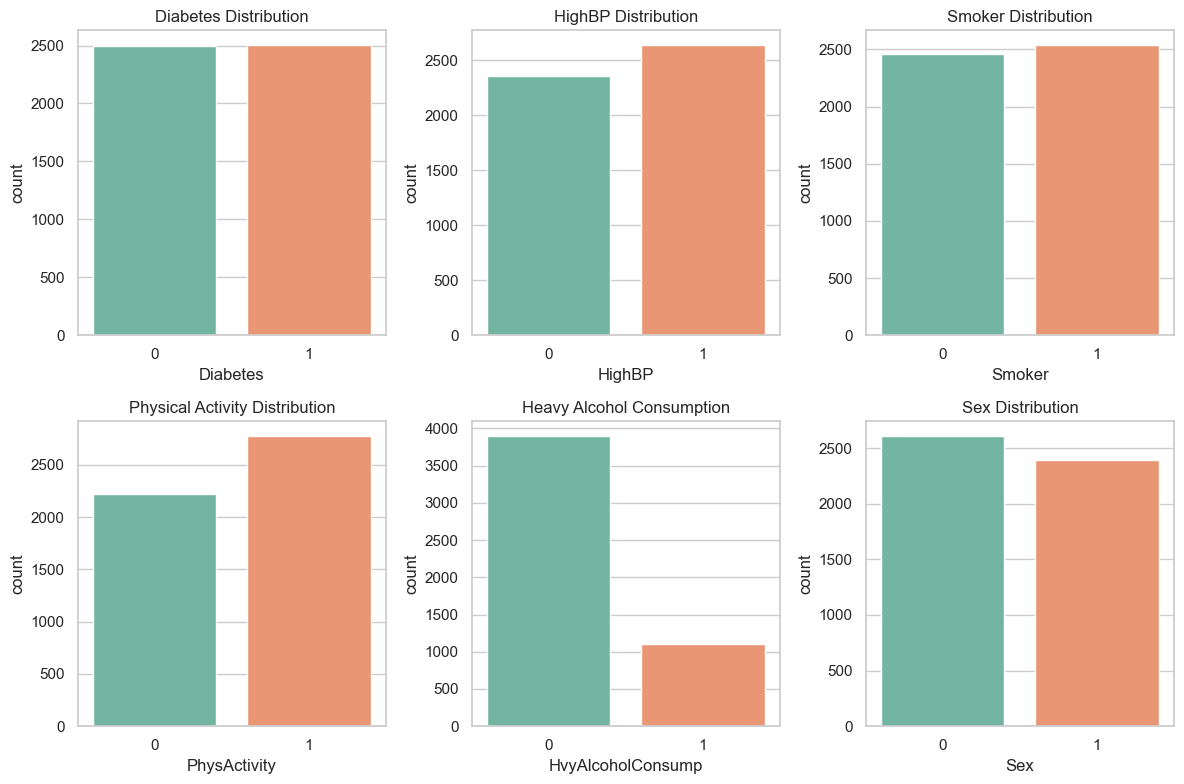

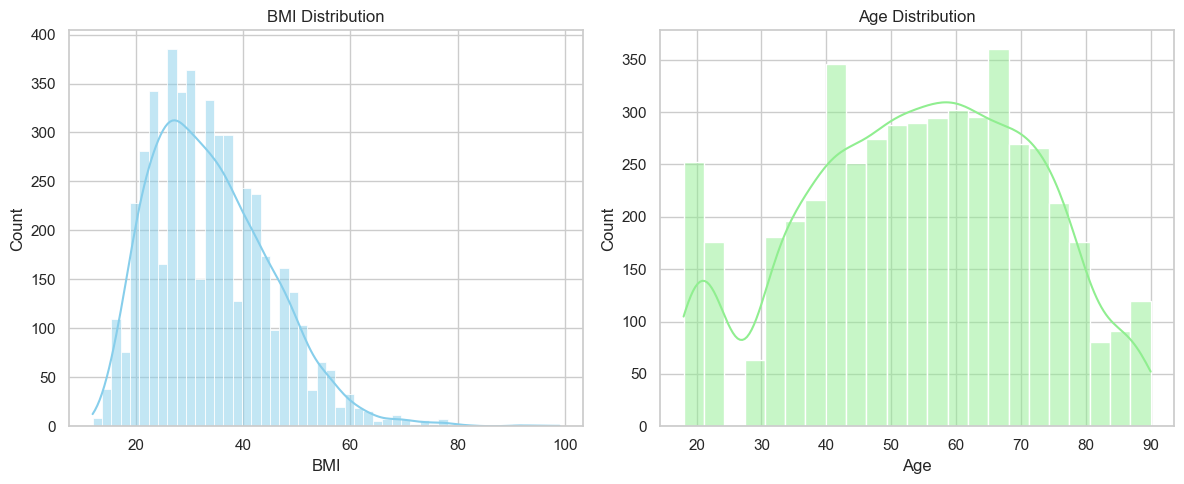

In [31]:
check_balance_Categorical_Columns(df_reduced)
check_balance_Numeric_Columns(df_reduced)

In [35]:
df_reduced.to_csv("Final_ppl_data.csv",index=False)

In [238]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline
# from sklearn.metrics import classification_report

In [179]:
# # Prepare feature matrices and target vectors
# X = df_reduced[['BMI', 'Smoker', 'PhysActivity', 'HvyAlcoholConsump', 'Sex', 'Age']]
# y_highbp = df_reduced['HighBP']
# y_diabetes = df_reduced['Diabetes']

# # Split data into training and testing sets
# X_train, X_test, y_highbp_train, y_highbp_test = train_test_split(X, y_highbp, test_size=0.01, random_state=42)
# X_train, X_test, y_diabetes_train, y_diabetes_test = train_test_split(X, y_diabetes, test_size=0.01, random_state=42)

# # Train Logistic Regression models
# model_highbp = LogisticRegression()
# model_diabetes = LogisticRegression()

# model_highbp.fit(X_train, y_highbp_train)
# model_diabetes.fit(X_train, y_diabetes_train)

# # Predict probabilities for the data where HighBP or Diabetes is 1
# highbp_mask = df_reduced['HighBP'] == 1
# diabetes_mask = df_reduced['Diabetes'] == 1

# # Predictions
# prob_highbp = model_highbp.predict_proba(X[highbp_mask])[:, 1]  # Probability of HighBP being 1
# prob_diabetes = model_diabetes.predict_proba(X[diabetes_mask])[:, 1]  # Probability of Diabetes being 1

# # Add the probabilities back to the DataFrame
# df_reduced.loc[highbp_mask, 'HighBP_Prob'] = prob_highbp
# df_reduced.loc[diabetes_mask, 'Diabetes_Prob'] = prob_diabetes